# Predictions Based on First Year Data

## Dependencies

In [1]:
using DataFrames, DataArrays, Gadfly, Distributions, GLM

In [2]:
set_default_plot_size(985px, 400px);

## Preparing the Data

This data contains all years up to 2014

In [3]:
data = readtable("begfresh2.csv");

Load students that were admitted after 2005 and before 2015.

In [4]:
data = data[data[:ENTRYSEM] .>= 20063, :];

Transform entry year column (ex 20063 to 2006).

In [5]:
data[:ENTRYSEM] .-= 3;
data[:ENTRYSEM] ./= 10;

Convert NA values to 0

In [6]:
data[isna(data[:CUMGPA02]), :CUMGPA02] = 0;
data[isna(data[:CUMHRS02]), :CUMHRS02] = 0;
data[isna(data[:GRAD4]), :GRAD4] = 0;
data[isna(data[:GRAD5]), :GRAD5] = 0;
data[isna(data[:GRAD6]), :GRAD6] = 0;

Number of students:

In [7]:
students = size(data)[1]

32139

## Four Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- ACTCOMPSQ
- HSGPASQ
- Whether the student is male
- Whether the student is American Indian
- Second semester GPA
- Number of credit hours after the second semester
- Number of Major Changes

In [31]:
training_4year = data[data[:ENTRYSEM] .<= 2011, :];

In [32]:
gradmodel_4years = glm(GRAD4 ~ ACTCOMPSQ + HSGPASQ + MALE + AM_INDIAN + CUMGPA02 + CUMHRS02 + CHANGE_1, training_4year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
                Estimate  Std.Error  z value Pr(>|z|)
(Intercept)     -6.40132   0.119912 -53.3834   <1e-99
ACTCOMPSQ    0.000266742 8.17513e-5  3.26285   0.0011
HSGPASQ        0.0270398 0.00507232  5.33085    <1e-7
MALE           -0.112441  0.0271248 -4.14533    <1e-4
AM_INDIAN      -0.317613  0.0797081  -3.9847    <1e-4
CUMGPA02         0.85237   0.030394  28.0441   <1e-99
CUMHRS02       0.0799119 0.00349562  22.8606   <1e-99
CHANGE_1       0.0903158  0.0261295  3.45647   0.0005


### Make Predictions Using the Training Model

In [33]:
year = 2006;
years = [];
actual_4year = [];
predicted_4year = [];

for i=1:9
    X = data[data[:ENTRYSEM] .== year, :]
    probs = predict(gradmodel_4years, X)
    push!(predicted_4year, mean(probs)*100)
    year <= 2011 ? push!(actual_4year, mean(X[:GRAD4])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [53]:
rmse = sqrt(sum((predicted_4year[1:6]-actual_4year).^2)) / 6

0.6529372071181524

#### Plot

In [35]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_4year = layer(x=years, y=predicted_4year, Geom.point, Geom.line, theme_predicted);

In [36]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_4year = layer(x=years[1:6], y=actual_4year, Geom.point, Geom.line, theme_actual);

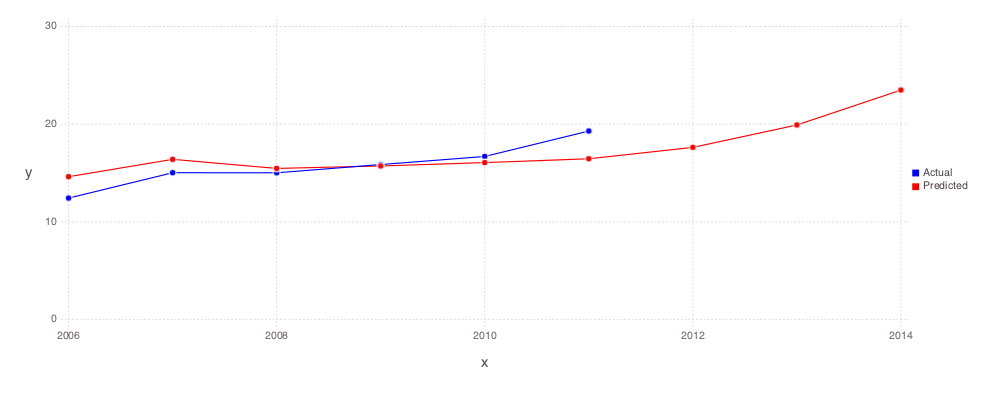

In [37]:
plot(layer_predicted_4year, layer_actual_4year, Coord.Cartesian(ymin=0,ymax=30), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))

## Five Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- HSGPASQ
- Whether the student is male
- Whether the student is American Indian
- Second semester GPA
- Number of credit hours after the second semester
- Number of Major Changes

In [65]:
training_5year = data[data[:ENTRYSEM] .<= 2010, :];

In [66]:
gradmodel_5years = glm(GRAD5 ~ HSGPASQ + MALE + AM_INDIAN + CUMGPA02 + CUMHRS02 + CHANGE_1, training_5year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
              Estimate  Std.Error  z value Pr(>|z|)
(Intercept)   -5.12698  0.0872783 -58.7429   <1e-99
HSGPASQ      0.0261397 0.00461936  5.65873    <1e-7
MALE         -0.139877  0.0244647  -5.7175    <1e-7
AM_INDIAN    -0.307671  0.0617846 -4.97974    <1e-6
CUMGPA02      0.898496  0.0247469  36.3075   <1e-99
CUMHRS02     0.0698109 0.00260278  26.8217   <1e-99
CHANGE_1      0.157246  0.0243499  6.45776    <1e-9


### Make Predictions Using the Training Model

In [67]:
year = 2006;
years = [];
actual_5year = [];
predicted_5year = [];

for i=1:9
    X = data[data[:ENTRYSEM] .== year, :]
    probs = predict(gradmodel_5years, X)
    push!(predicted_5year, mean(probs)*100)
    year <= 2010 ? push!(actual_5year, mean(X[:GRAD5])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [68]:
rmse = sqrt(sum((predicted_5year[1:5]-actual_5year).^2)) / 5

0.3820530314116269

#### Plot

In [69]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_5year = layer(x=years, y=predicted_5year, Geom.point, Geom.line, theme_predicted);

In [70]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_5year = layer(x=years[1:5], y=actual_5year, Geom.point, Geom.line, theme_actual);

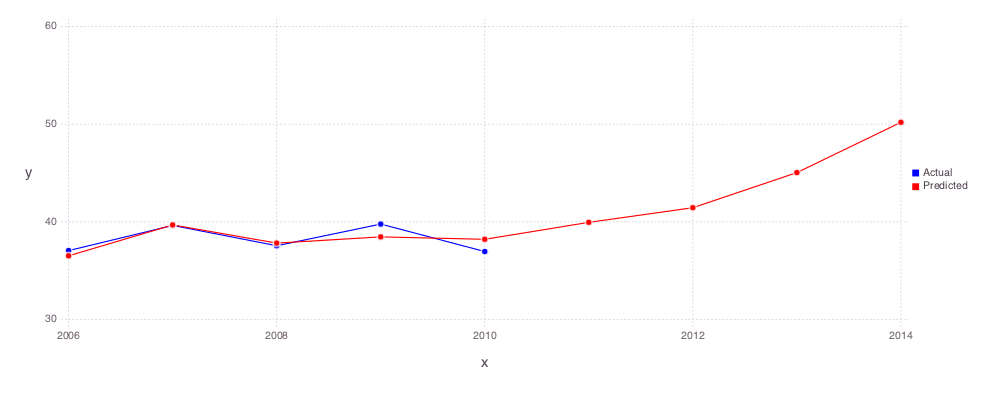

In [74]:
plot(layer_predicted_5year, layer_actual_5year, Coord.Cartesian(ymin=30,ymax=60), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))

## Six Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- ACTCOMPSQ
- Whether the student is American Indian
- Second semester GPA
- Number of credit hours after the second semester
- Number of Major Changes
- FIVE_YR1

In [114]:
training_6year = data[data[:ENTRYSEM] .<= 2009, :];
# training_6year = training_6year[!isna(training_6year[:FIVE_YR1]), :];

In [115]:
gradmodel_6years = glm(GRAD6 ~ ACTCOMPSQ + AM_INDIAN + CUMGPA02 + CUMHRS02 + CHANGE_1 + FIVE_YR1, training_6year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
                 Estimate  Std.Error  z value Pr(>|z|)
(Intercept)      -3.09893   0.179531 -17.2613   <1e-66
ACTCOMPSQ    -0.000351852 8.33118e-5 -4.22331    <1e-4
AM_INDIAN        -0.27144  0.0640563 -4.23752    <1e-4
CUMGPA02         0.583345  0.0501643  11.6287   <1e-30
CUMHRS02        0.0395263 0.00436887  9.04728   <1e-18
CHANGE_1         0.117146  0.0280478  4.17665    <1e-4
FIVE_YR1          1.22262   0.172171   7.1012   <1e-11


### Make Predictions Using the Training Model

In [116]:
year = 2006;
years = [];
actual_6year = [];
predicted_6year = [];

for i=1:9
    X = data[data[:ENTRYSEM] .== year, :]
    X = X[!isna(X[:FIVE_YR1]), :]
    probs = predict(gradmodel_6years, X)
    push!(predicted_6year, mean(probs)*100)
    year <= 2009 ? push!(actual_6year, mean(X[:GRAD6])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [117]:
rmse = sqrt(sum((predicted_6year[1:4]-actual_6year).^2)) / 4

0.3228020304232486

In [118]:
X = data[data[:ENTRYSEM] .== 2006, :];

#### Plot

In [122]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_6year = layer(x=years, y=predicted_6year, Geom.point, Geom.line, theme_predicted);

In [123]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_6year = layer(x=years[1:4], y=actual_6year, Geom.point, Geom.line, theme_actual);

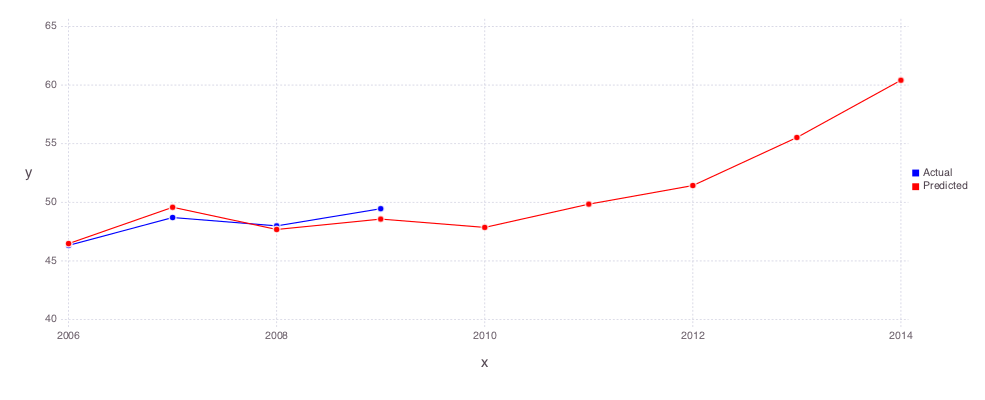

In [127]:
plot(layer_predicted_6year, layer_actual_6year, Coord.Cartesian(ymin=40,ymax=65), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))